In [1]:
from stats_can import StatsCan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#seaborn theme
import seaborn as sns
sns.set(font='Gill Sans MT')

In [2]:
sc = StatsCan()


In [ ]:
sc.update_tables()

In [3]:
world_mig = sc.table_to_df('17-10-0040-01')
prov_mig = sc.table_to_df('17-10-0020-01')
nat_pop = sc.table_to_df('17-10-0059-01')

In [4]:
prov_mig.rename(columns={"Interprovincial migration":"Components of population growth"},inplace=True)
migrate = world_mig.append(prov_mig)
nat_pop.rename(columns={"Estimates":"Components of population growth"},inplace=True)
migrate = migrate.append(nat_pop)

In [5]:
migrate

,REF_DATE,GEO,DGUID,Components of population growth,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-01-01,Canada,2016A000011124,Immigrants,Persons,249,units,0,v29850342,1.1,12738.0,NaN,NaN,NaN,0
1,1946-01-01,Prince Edward Island,2016A000211,Immigrants,Persons,249,units,0,v29850352,3.1,73.0,NaN,NaN,NaN,0
2,1946-01-01,Nova Scotia,2016A000212,Immigrants,Persons,249,units,0,v29850357,4.1,701.0,NaN,NaN,NaN,0
3,1946-01-01,New Brunswick,2016A000213,Immigrants,Persons,249,units,0,v29850362,5.1,520.0,NaN,NaN,NaN,0
4,1946-01-01,Quebec,2016A000224,Immigrants,Persons,249,units,0,v29850367,6.1,2305.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,2020-07-01,Yukon,2016A000260,Deaths,Number,223,units,0,v80,12.2,63.0,NaN,NaN,NaN,0
11090,2020-07-01,Northwest Territories,2016A000261,Births,Number,223,units,0,v67,14.1,137.0,NaN,NaN,NaN,0
11091,2020-07-01,Northwest Territories,2016A000261,Deaths,Number,223,units,0,v82,14.2,78.0,NaN,NaN,NaN,0
11092,2020-07-01,Nunavut,2016A000262,Births,Number,223,units,0,v68,15.1,217.0,NaN,NaN,NaN,0


In [6]:
ab_migrate=migrate[migrate['GEO']=='Alberta']

In [7]:
ab_migrate.dropna(subset=['Components of population growth'],inplace=True)



In [8]:
ab_migrate=ab_migrate[['REF_DATE','Components of population growth','VALUE']]

In [9]:
ab_migrate

,REF_DATE,Components of population growth,VALUE
8,1946-01-01,Immigrants,1044.0
20,1946-04-01,Immigrants,1718.0
32,1946-07-01,Immigrants,2095.0
44,1946-10-01,Immigrants,914.0
56,1947-01-01,Immigrants,569.0
...,...,...,...
11029,2020-01-01,Deaths,7151.0
11056,2020-04-01,Births,13540.0
11057,2020-04-01,Deaths,6834.0
11084,2020-07-01,Births,13652.0


In [10]:
ab_pivot = ab_migrate.pivot(index='REF_DATE',columns='Components of population growth',values='VALUE')

In [11]:
ab_pivot

Components of population growth,Births,Deaths,Emigrants,Immigrants,In-migrants,Marriages,Net non-permanent residents,Net temporary emigrants,Out-migrants,Returning emigrants
REF_DATE,,,,,,,,,,
1946-01-01,4791.0,1765.0,NaN,1044.0,NaN,1614.0,NaN,NaN,NaN,NaN
1946-04-01,5752.0,1619.0,NaN,1718.0,NaN,2572.0,NaN,NaN,NaN,NaN
1946-07-01,6012.0,1489.0,NaN,2095.0,NaN,2603.0,NaN,NaN,NaN,NaN
1946-10-01,5629.0,1728.0,NaN,914.0,NaN,2689.0,NaN,NaN,NaN,NaN
1947-01-01,6214.0,1778.0,NaN,569.0,NaN,1461.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-07-01,13630.0,6320.0,2472.0,12682.0,17782.0,NaN,2973.0,671.0,16518.0,2188.0
2019-10-01,12252.0,6921.0,1279.0,10047.0,12189.0,NaN,1173.0,537.0,10634.0,787.0
2020-01-01,12574.0,7151.0,1270.0,8499.0,18129.0,NaN,-717.0,354.0,16032.0,1283.0


In [12]:
ab_pivot['Net interprovincial migration']=ab_pivot['In-migrants']-ab_pivot['Out-migrants']

ab_pivot['Net international migration']=ab_pivot['Immigrants']+ab_pivot['Net non-permanent residents']-ab_pivot['Emigrants']-ab_pivot['Net temporary emigrants']-ab_pivot['Returning emigrants']

ab_pivot['Total net migration']=ab_pivot['Net interprovincial migration']+ab_pivot['Net international migration']

ab_pivot['Net population growth']=ab_pivot['Total net migration']+ ab_pivot['Births']-ab_pivot['Deaths']

In [13]:
ab_pivot

Components of population growth,Births,Deaths,Emigrants,Immigrants,In-migrants,Marriages,Net non-permanent residents,Net temporary emigrants,Out-migrants,Returning emigrants,Net interprovincial migration,Net international migration,Total net migration,Net population growth
REF_DATE,,,,,,,,,,,,,,
1946-01-01,4791.0,1765.0,NaN,1044.0,NaN,1614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-04-01,5752.0,1619.0,NaN,1718.0,NaN,2572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-07-01,6012.0,1489.0,NaN,2095.0,NaN,2603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-10-01,5629.0,1728.0,NaN,914.0,NaN,2689.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-01-01,6214.0,1778.0,NaN,569.0,NaN,1461.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,13630.0,6320.0,2472.0,12682.0,17782.0,NaN,2973.0,671.0,16518.0,2188.0,1264.0,10324.0,11588.0,18898.0
2019-10-01,12252.0,6921.0,1279.0,10047.0,12189.0,NaN,1173.0,537.0,10634.0,787.0,1555.0,8617.0,10172.0,15503.0
2020-01-01,12574.0,7151.0,1270.0,8499.0,18129.0,NaN,-717.0,354.0,16032.0,1283.0,2097.0,4875.0,6972.0,12395.0


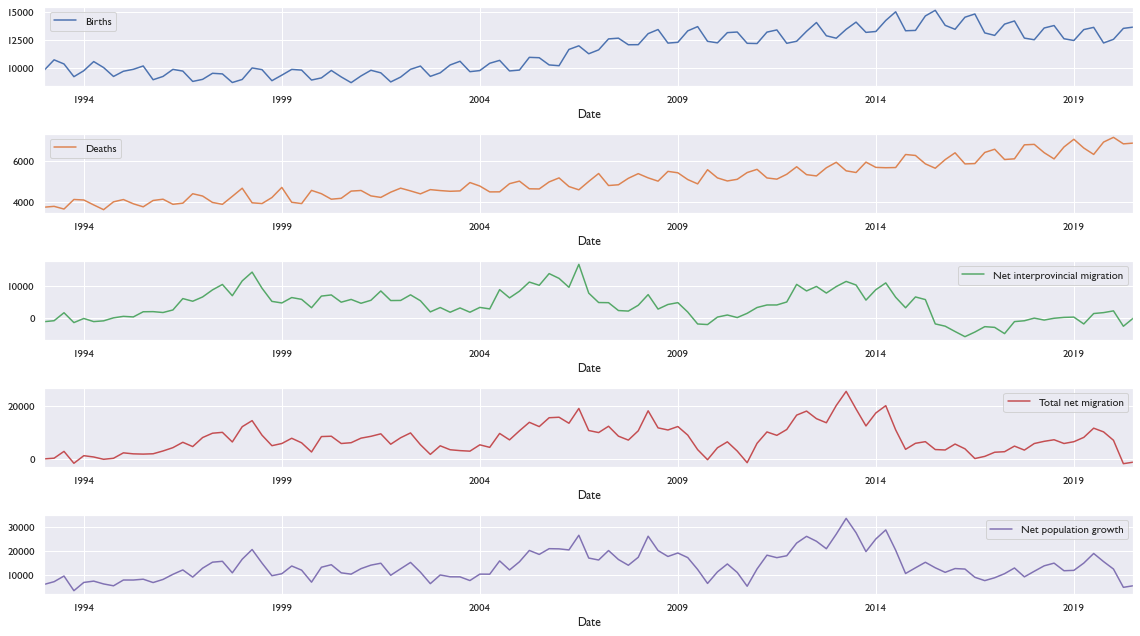

In [14]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title('Alberta Components of Population Growth')


ab_pivot[['Births','Deaths','Net interprovincial migration','Total net migration','Net population growth']]['1993':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('migration.png')